In [192]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
dfr=pd.read_csv("Rose.csv")
dfr.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
dfr["YearMonth"]=pd.to_datetime(dfr["YearMonth"],infer_datetime_format=True)

In [6]:
dfr.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [7]:
dfr.set_index(dfr["YearMonth"],inplace=True,drop="YearMonth")
dfr.drop("YearMonth",axis=1,inplace=True)
dfr.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [8]:
dfs= pd.read_csv("Sparkling.csv")
dfs["YearMonth"]=pd.to_datetime(dfs["YearMonth"],infer_datetime_format=True)
dfs.set_index(dfs["YearMonth"],inplace=True,drop="YearMonth")
dfs.drop("YearMonth",axis=1,inplace=True)
dfs.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [9]:
dfr.isnull().sum()

Rose    2
dtype: int64

In [10]:
dfr.ffill(inplace=True)

In [11]:
dfr.isnull().sum()

Rose    0
dtype: int64

In [12]:
dfs.isnull().sum()

Sparkling    0
dtype: int64

1. Read the data as an appropriate Time Series data and plot the data.

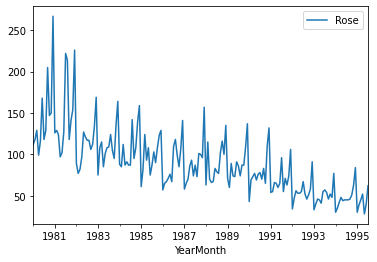

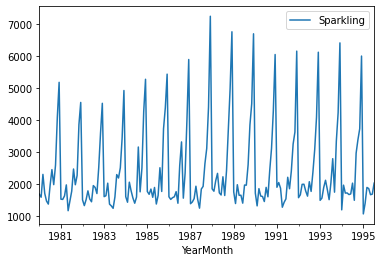

In [13]:

dfr.plot()
plt.show()

dfs.plot()
plt.show()


2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [189]:
dfr.describe()

,Rose
count,187.000000
mean,89.909091
std,39.244440
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [190]:
dfs.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


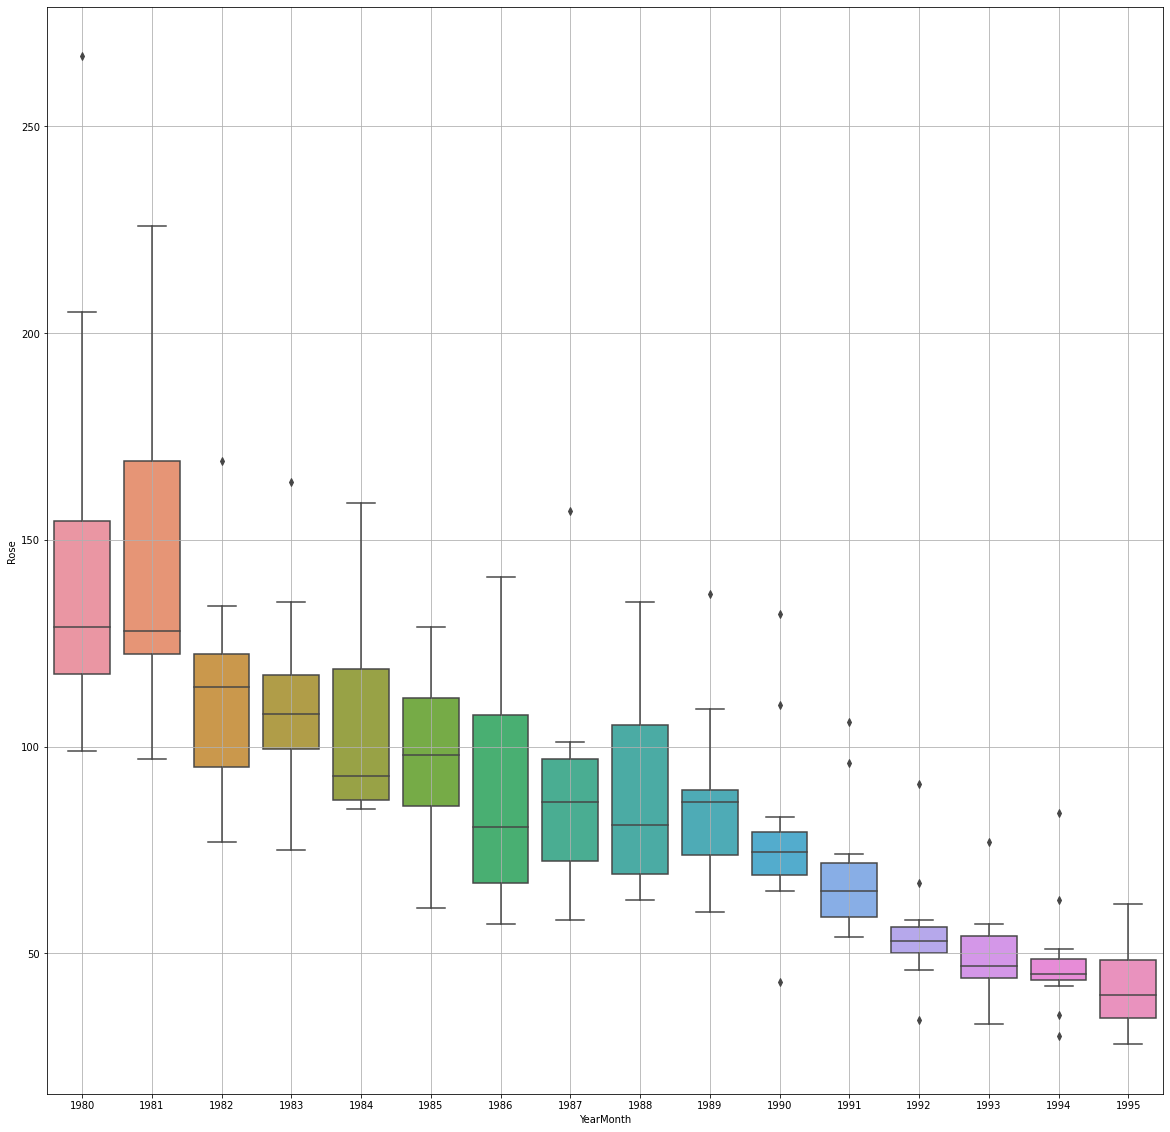

In [197]:
plt.figure(figsize=(20,20))
sns.boxplot(x = dfr.index.year,y = dfr['Rose'])
plt.grid();

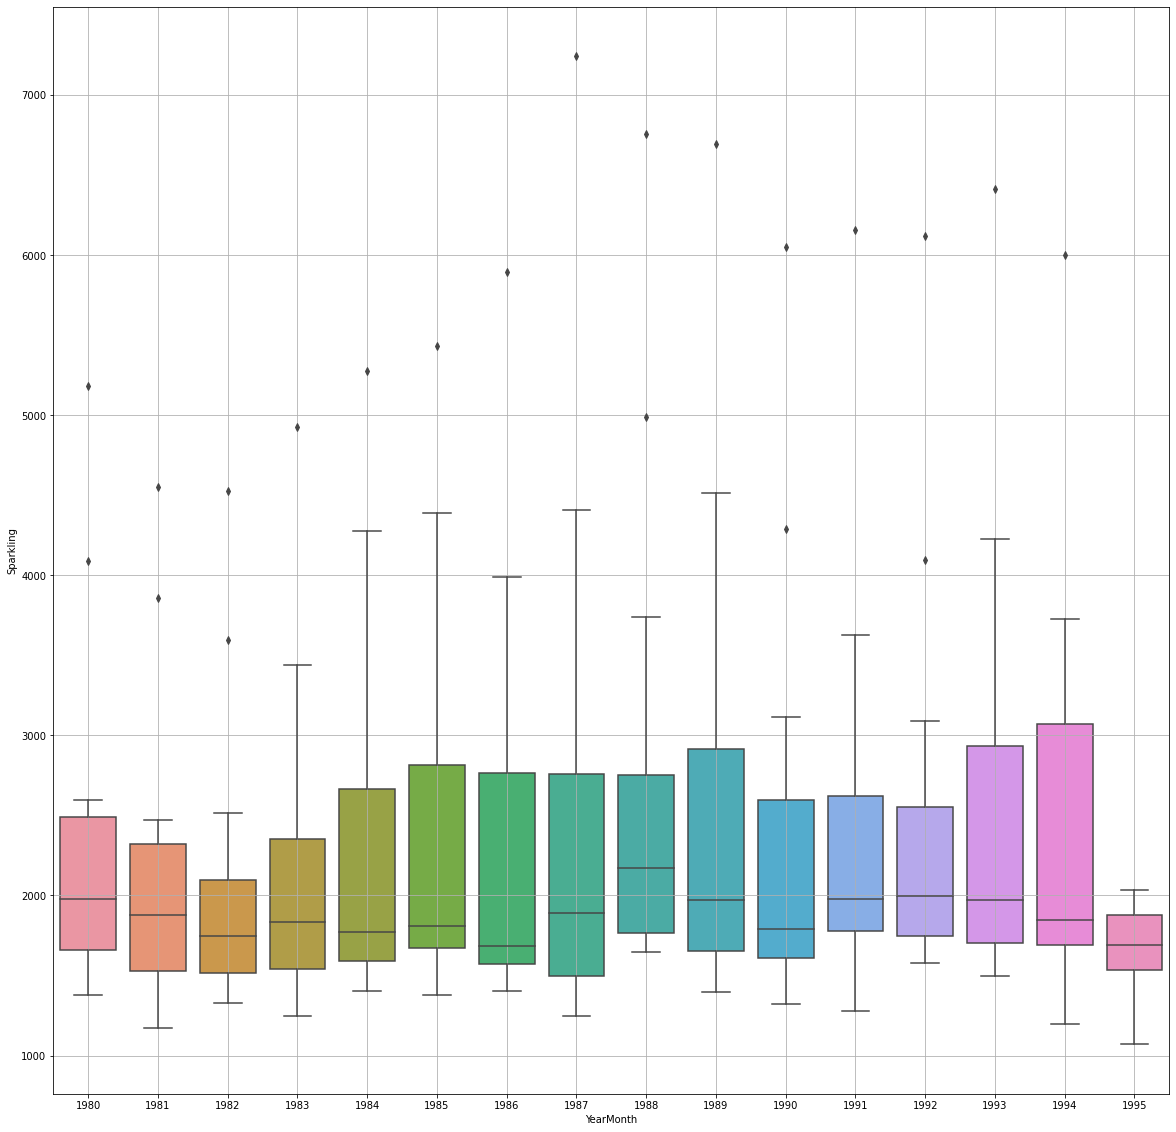

In [198]:
plt.figure(figsize=(20,20))
sns.boxplot(x = dfs.index.year,y = dfs['Sparkling'])
plt.grid();

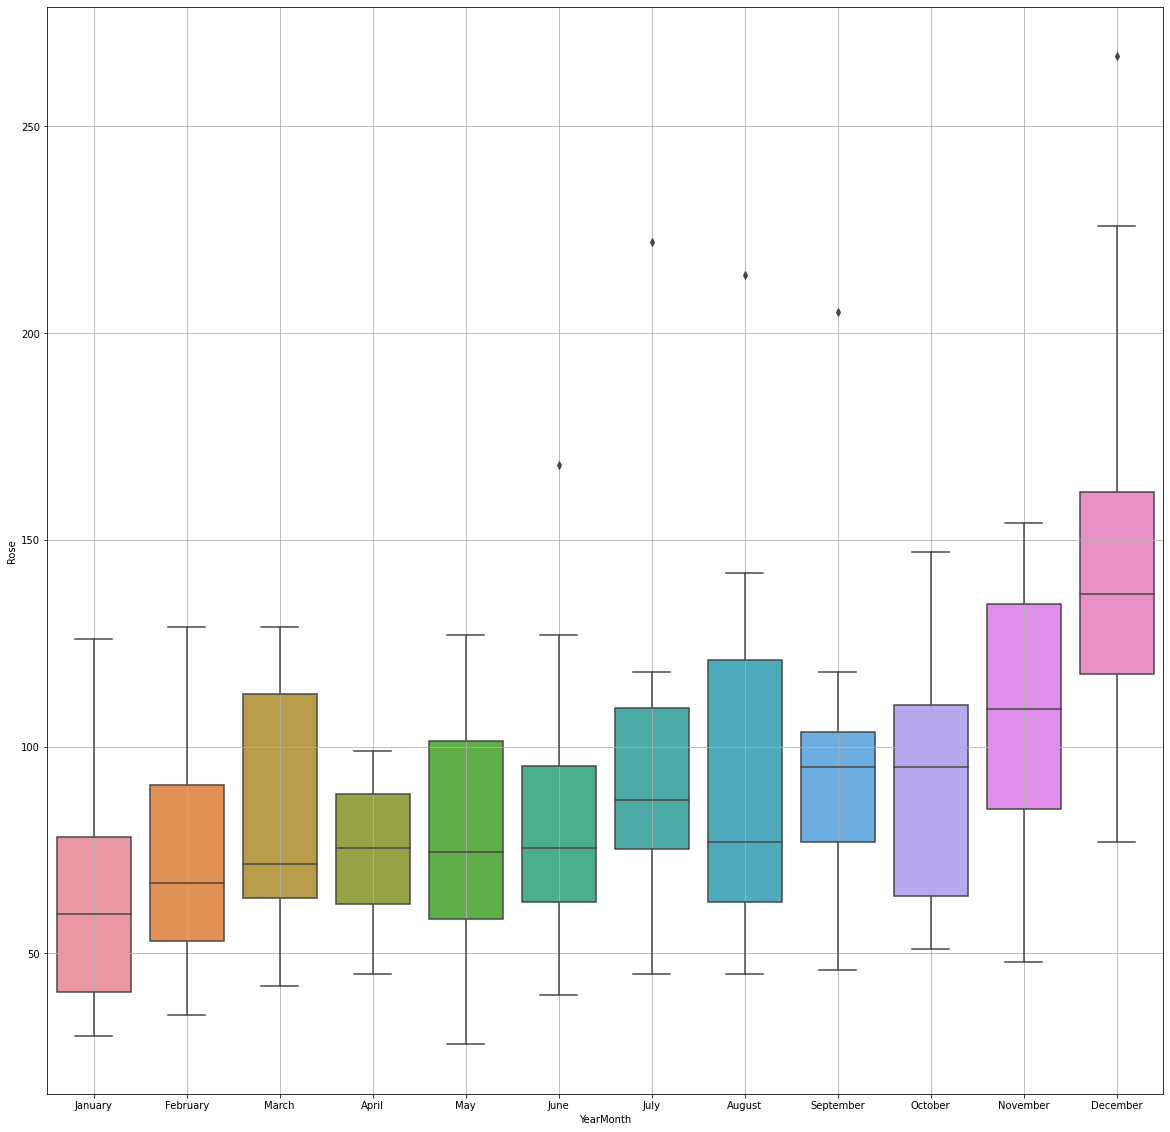

In [199]:
plt.figure(figsize=(20,20))
sns.boxplot(x = dfr.index.month_name(),y = dfr['Rose'])
plt.grid();

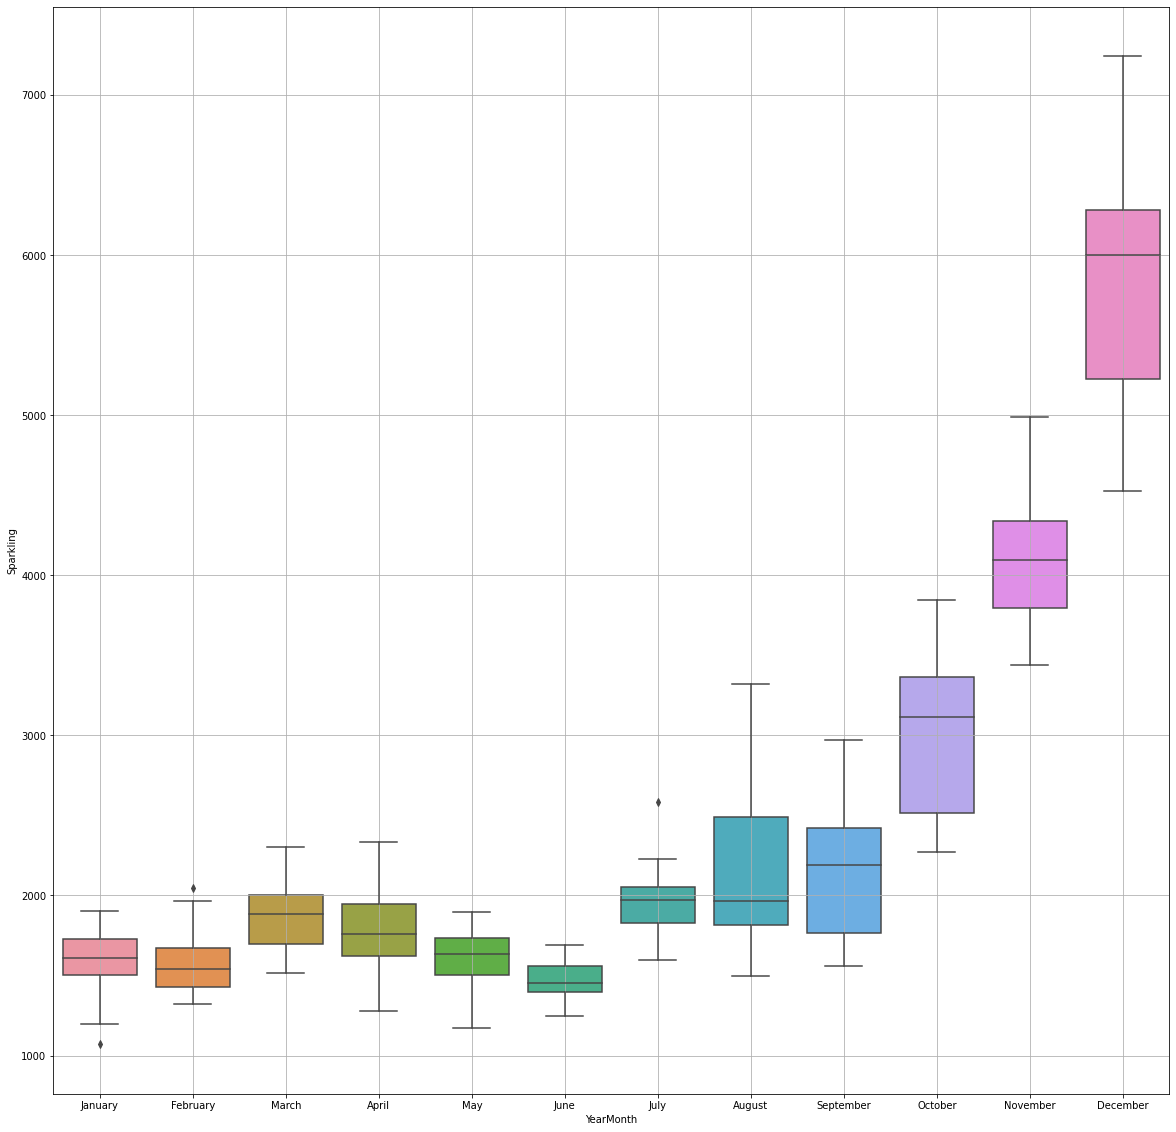

In [200]:
plt.figure(figsize=(20,20))
sns.boxplot(x = dfs.index.month_name(),y = dfs['Sparkling'])
plt.grid();

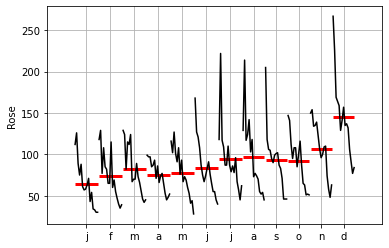

In [201]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(dfr['Rose'],ylabel='Rose')
plt.grid();

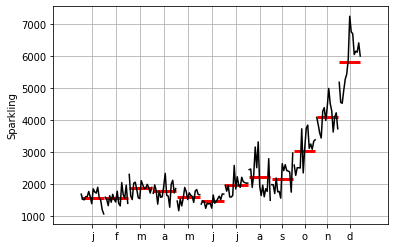

In [202]:
month_plot(dfs['Sparkling'],ylabel='Sparkling')
plt.grid();

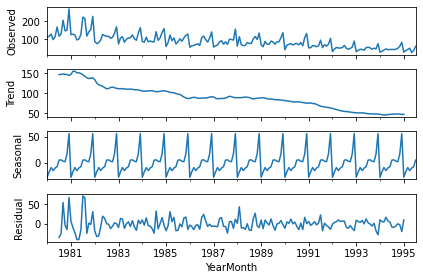

In [14]:
dfr_add_decompose= seasonal_decompose(dfr,model="additive")
dfr_add_decompose.plot()
plt.show()

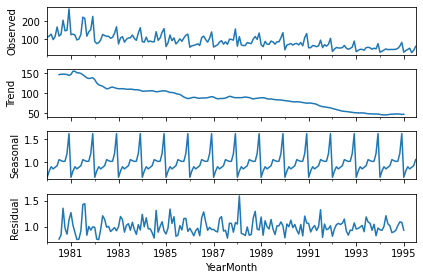

In [15]:
dfr_multi_decompose= seasonal_decompose(dfr,model="multiplicative")
dfr_multi_decompose.plot()
plt.show()

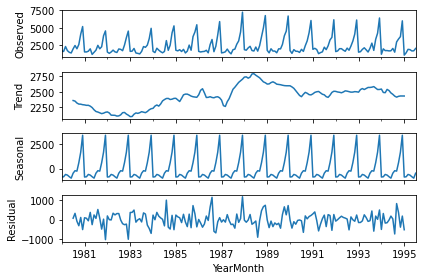

In [16]:
dfs_add_decompose= seasonal_decompose(dfs,model="additive")
dfs_add_decompose.plot()
plt.show()

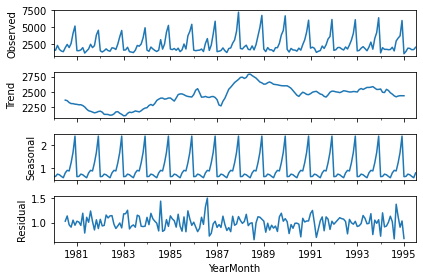

In [17]:
dfs_multi_decompose= seasonal_decompose(dfs,model="multiplicative")
dfs_multi_decompose.plot()
plt.show()

In [18]:
trend = dfr_add_decompose.trend
seasonality = dfr_add_decompose.seasonal
residual = dfr_add_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
                   Rose
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01  147.083333
1980-08-01  148.125000
1980-09-01  148.375000
1980-10-01  148.083333
1980-11-01  147.416667
1980-12-01  145.125000 

Seasonality 
                  Rose
YearMonth            
1980-01-01 -27.903092
1980-02-01 -17.431663
1980-03-01  -9.279878
1980-04-01 -15.092378
1980-05-01 -10.190592
1980-06-01  -7.672735
1980-07-01   4.880241
1980-08-01   5.460797
1980-09-01   2.780241
1980-10-01   1.877464
1980-11-01  16.852464
1980-12-01  55.719130 

Residual 
                  Rose
YearMonth            
1980-01-01        NaN
1980-02-01        NaN
1980-03-01        NaN
1980-04-01        NaN
1980-05-01        NaN
1980-06-01        NaN
1980-07-01 -33.963575
1980-08-01 -24.585797
1980-09-01  53.844759
1980-10-01  -2.960797
1980-11-01 -14.269130
1980-12-01  66.155870 



In [19]:
trend = dfs_add_decompose.trend
seasonality = dfs_add_decompose.seasonal
residual = dfs_add_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
               Sparkling
YearMonth              
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01  2360.666667
1980-08-01  2351.333333
1980-09-01  2320.541667
1980-10-01  2303.583333
1980-11-01  2302.041667
1980-12-01  2293.791667 

Seasonality 
               Sparkling
YearMonth              
1980-01-01  -854.260599
1980-02-01  -830.350678
1980-03-01  -592.356630
1980-04-01  -658.490559
1980-05-01  -824.416154
1980-06-01  -967.434011
1980-07-01  -465.502265
1980-08-01  -214.332821
1980-09-01  -254.677265
1980-10-01   599.769957
1980-11-01  1675.067179
1980-12-01  3386.983846 

Residual 
              Sparkling
YearMonth             
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01   70.835599
1980-08-01  315.999487
1980-09-01  -81.864401
1980-10-01 -307.353290
1980-11-01  109

3.Split the data into training and test. The test data should start in 1991.

In [20]:
train_r= dfr[dfr.index<'1991']
test_r=dfr[dfr.index>'1991']


In [21]:
train_r.head()


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [22]:
test_r.head()

,Rose
YearMonth,
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0


In [23]:
train_s= dfs[dfs.index<'1991']
test_s=dfs[dfs.index>'1991']


4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [24]:
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em

**SES**


In [25]:
SES_r = SimpleExpSmoothing(train_r)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [26]:
SES_r_autofit=SES_r.fit(optimized=True)

In [27]:
SES_r_autofit.params

{'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09875003987520162,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [28]:
SES_r_predict = SES_r_autofit.forecast(steps=len(test_r))
SES_r_predict


1991-01-01    87.105003
1991-02-01    87.105003
1991-03-01    87.105003
1991-04-01    87.105003
1991-05-01    87.105003
1991-06-01    87.105003
1991-07-01    87.105003
1991-08-01    87.105003
1991-09-01    87.105003
1991-10-01    87.105003
1991-11-01    87.105003
1991-12-01    87.105003
1992-01-01    87.105003
1992-02-01    87.105003
1992-03-01    87.105003
1992-04-01    87.105003
1992-05-01    87.105003
1992-06-01    87.105003
1992-07-01    87.105003
1992-08-01    87.105003
1992-09-01    87.105003
1992-10-01    87.105003
1992-11-01    87.105003
1992-12-01    87.105003
1993-01-01    87.105003
1993-02-01    87.105003
1993-03-01    87.105003
1993-04-01    87.105003
1993-05-01    87.105003
1993-06-01    87.105003
1993-07-01    87.105003
1993-08-01    87.105003
1993-09-01    87.105003
1993-10-01    87.105003
1993-11-01    87.105003
1993-12-01    87.105003
1994-01-01    87.105003
1994-02-01    87.105003
1994-03-01    87.105003
1994-04-01    87.105003
1994-05-01    87.105003
1994-06-01    87

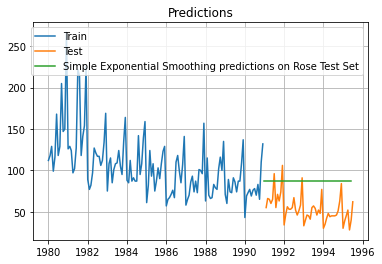

In [29]:
plt.plot(train_r, label='Train')
plt.plot(test_r, label='Test')

plt.plot(SES_r_predict, label='Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');


In [30]:
print('SES RMSE :',em.rmse(test_r.values,SES_r_predict.values)[0])

SES RMSE : 36.882123618376205


In [31]:
results_r = pd.DataFrame({'Test RMSE': [em.rmse(test_r.values,SES_r_predict.values)[0]]},index=['SES_r'])
results_r

,Test RMSE
SES_r,36.882124


In [32]:
SES_s = SimpleExpSmoothing(train_s)
SES_s_autofit=SES_s.fit(optimized=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [33]:
SES_s_autofit.params

{'damping_slope': nan,
 'initial_level': 2403.7828696439005,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.0,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [34]:
SES_s_predict = SES_s_autofit.forecast(steps=len(test_s))
SES_s_predict


1991-01-01    2403.78287
1991-02-01    2403.78287
1991-03-01    2403.78287
1991-04-01    2403.78287
1991-05-01    2403.78287
1991-06-01    2403.78287
1991-07-01    2403.78287
1991-08-01    2403.78287
1991-09-01    2403.78287
1991-10-01    2403.78287
1991-11-01    2403.78287
1991-12-01    2403.78287
1992-01-01    2403.78287
1992-02-01    2403.78287
1992-03-01    2403.78287
1992-04-01    2403.78287
1992-05-01    2403.78287
1992-06-01    2403.78287
1992-07-01    2403.78287
1992-08-01    2403.78287
1992-09-01    2403.78287
1992-10-01    2403.78287
1992-11-01    2403.78287
1992-12-01    2403.78287
1993-01-01    2403.78287
1993-02-01    2403.78287
1993-03-01    2403.78287
1993-04-01    2403.78287
1993-05-01    2403.78287
1993-06-01    2403.78287
1993-07-01    2403.78287
1993-08-01    2403.78287
1993-09-01    2403.78287
1993-10-01    2403.78287
1993-11-01    2403.78287
1993-12-01    2403.78287
1994-01-01    2403.78287
1994-02-01    2403.78287
1994-03-01    2403.78287
1994-04-01    2403.78287


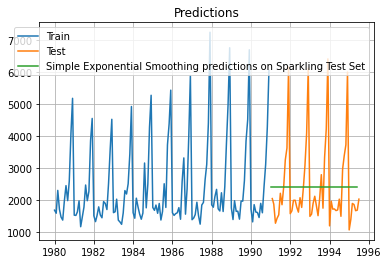

In [35]:
plt.plot(train_s, label='Train')
plt.plot(test_s, label='Test')

plt.plot(SES_s_predict, label='Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');


In [36]:
print('SES_S RMSE :',em.rmse(test_s.values,SES_s_predict.values)[0])

SES_S RMSE : 1285.020994187408


In [37]:
results_s = pd.DataFrame({'Test RMSE': [em.rmse(test_s.values,SES_s_predict.values)[0]]},index=['SES_s'])
results_s

,Test RMSE
SES_s,1285.020994


**HOLT**

In [38]:
DES_r = Holt(train_r)
DES_r_autofit=DES_r.fit()
DES_r.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'damping_slope': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 6.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.15789473684210525,
 'use_boxcox': False}

In [39]:
DES_r_predict =  DES_r_autofit.forecast(len(test_r))
DES_r_predict

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


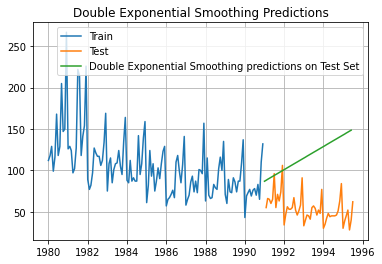

In [40]:
plt.plot(train_r, label='Train')
plt.plot(test_r, label='Test')

plt.plot(DES_r_predict, label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [41]:
print('DES RMSE:',mean_squared_error(test_r.values,DES_r_predict.values,squared=False))


DES RMSE: 70.04235617037166


In [42]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r.values,DES_r_predict.values,squared=False)]}
                           ,index=['DES'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356


In [43]:
DES_s = Holt(train_s)
DES_s_autofit=DES_s.fit()
DES_s.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'damping_slope': nan,
 'initial_level': 1686.0825794906987,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 27.05013613663255,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.6478144580517214,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [44]:
DES_s_predict =  DES_s_autofit.forecast(len(test_s))
DES_s_predict

1991-01-01    5281.489091
1991-02-01    5308.539227
1991-03-01    5335.589363
1991-04-01    5362.639499
1991-05-01    5389.689635
1991-06-01    5416.739771
1991-07-01    5443.789907
1991-08-01    5470.840044
1991-09-01    5497.890180
1991-10-01    5524.940316
1991-11-01    5551.990452
1991-12-01    5579.040588
1992-01-01    5606.090724
1992-02-01    5633.140860
1992-03-01    5660.190996
1992-04-01    5687.241133
1992-05-01    5714.291269
1992-06-01    5741.341405
1992-07-01    5768.391541
1992-08-01    5795.441677
1992-09-01    5822.491813
1992-10-01    5849.541949
1992-11-01    5876.592086
1992-12-01    5903.642222
1993-01-01    5930.692358
1993-02-01    5957.742494
1993-03-01    5984.792630
1993-04-01    6011.842766
1993-05-01    6038.892902
1993-06-01    6065.943039
1993-07-01    6092.993175
1993-08-01    6120.043311
1993-09-01    6147.093447
1993-10-01    6174.143583
1993-11-01    6201.193719
1993-12-01    6228.243855
1994-01-01    6255.293991
1994-02-01    6282.344128
1994-03-01  

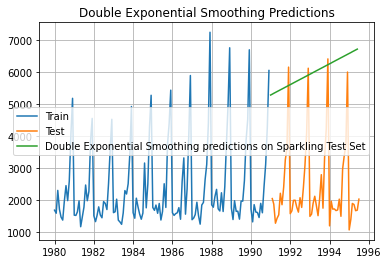

In [45]:
plt.plot(train_s, label='Train')
plt.plot(test_s, label='Test')

plt.plot(DES_s_predict, label='Double Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [46]:
print('DES RMSE:',mean_squared_error(test_s.values,DES_s_predict.values,squared=False))


DES RMSE: 3833.622104672874


In [47]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s.values,DES_s_predict.values,squared=False)]}
                           ,index=['DES'])

results_s = pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105


**Holt Winter's linear method with additive errors¶**

In [48]:
TES_r = ExponentialSmoothing(train_r,trend='additive',seasonal='additive')
TES_r_fit= TES_r.fit()
TES_r_fit.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'damping_slope': nan,
 'initial_level': 76.40262381194242,
 'initial_seasons': array([ 38.68624225,  51.02099115,  58.99256853,  48.32902411,
         57.12003189,  62.54839839,  72.43366307,  78.50129011,
         74.47816209,  72.54576094,  90.61515859, 132.86758386]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.13346990008678222,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.013793634338389796,
 'use_boxcox': False}

In [49]:
TES_r_predict=TES_r_fit.forecast(len(test_r))
TES_r_predict

1991-01-01     44.130344
1991-02-01     56.069626
1991-03-01     63.645737
1991-04-01     52.586727
1991-05-01     60.982268
1991-06-01     66.015168
1991-07-01     75.504967
1991-08-01     81.177127
1991-09-01     76.758533
1991-10-01     74.430665
1991-11-01     92.104597
1991-12-01    133.961556
1992-01-01     39.384748
1992-02-01     51.324030
1992-03-01     58.900141
1992-04-01     47.841131
1992-05-01     56.236672
1992-06-01     61.269572
1992-07-01     70.759371
1992-08-01     76.431531
1992-09-01     72.012937
1992-10-01     69.685069
1992-11-01     87.359001
1992-12-01    129.215960
1993-01-01     34.639152
1993-02-01     46.578434
1993-03-01     54.154545
1993-04-01     43.095534
1993-05-01     51.491076
1993-06-01     56.523976
1993-07-01     66.013774
1993-08-01     71.685935
1993-09-01     67.267341
1993-10-01     64.939473
1993-11-01     82.613405
1993-12-01    124.470364
1994-01-01     29.893556
1994-02-01     41.832838
1994-03-01     49.408949
1994-04-01     38.349938


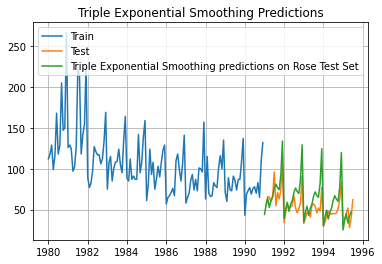

In [50]:
plt.plot(train_r, label='Train')
plt.plot(test_r, label='Test')

plt.plot(TES_r_predict, label='Triple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [51]:
print('TES RMSE:',mean_squared_error(test_r.values,TES_r_predict.values,squared=False))


TES RMSE: 28.352591629250515


In [52]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r.values,TES_r_predict.values,squared=False)]}
                           ,index=['TES_additive'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592


In [53]:
TES_s=  ExponentialSmoothing(train_s,trend='additive',seasonal='additive')
TES_s_fit=TES_s.fit()
TES_s_fit.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'damping_slope': nan,
 'initial_level': 1685.012792659747,
 'initial_seasons': array([  38.53437848,  -37.58205472,  464.84418171,  205.8317736 ,
        -140.67468508, -156.94463912,  338.18645503,  856.3663037 ,
         402.95623136,  971.15074363, 2401.43787839, 3426.35728898]),
 'initial_slope': 1.9144384621230306e-09,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.08622068066400991,
 'smoothing_seasonal': 0.47641579236437037,
 'smoothing_slope': 1.0548986177830093e-09,
 'use_boxcox': False}

In [54]:
TES_s_predict=TES_s_fit.forecast(len(test_s))
TES_s_predict

1991-01-01    1532.364557
1991-02-01    1241.299611
1991-03-01    1726.710821
1991-04-01    1584.229829
1991-05-01    1493.939460
1991-06-01    1311.397130
1991-07-01    1834.771146
1991-08-01    1696.030186
1991-09-01    2338.847268
1991-10-01    3249.212792
1991-11-01    4324.359020
1991-12-01    6461.335328
1992-01-01    1532.364557
1992-02-01    1241.299611
1992-03-01    1726.710821
1992-04-01    1584.229829
1992-05-01    1493.939460
1992-06-01    1311.397130
1992-07-01    1834.771146
1992-08-01    1696.030186
1992-09-01    2338.847268
1992-10-01    3249.212792
1992-11-01    4324.359020
1992-12-01    6461.335328
1993-01-01    1532.364557
1993-02-01    1241.299611
1993-03-01    1726.710821
1993-04-01    1584.229829
1993-05-01    1493.939460
1993-06-01    1311.397130
1993-07-01    1834.771146
1993-08-01    1696.030186
1993-09-01    2338.847268
1993-10-01    3249.212792
1993-11-01    4324.359019
1993-12-01    6461.335328
1994-01-01    1532.364556
1994-02-01    1241.299610
1994-03-01  

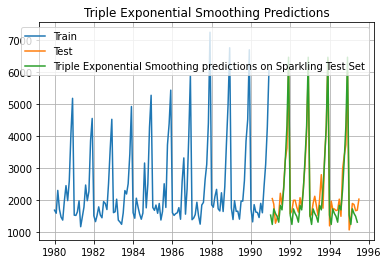

In [55]:
plt.plot(train_s, label='Train')
plt.plot(test_s, label='Test')

plt.plot(TES_s_predict, label='Triple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [56]:
print('TES RMSE:',mean_squared_error(test_s.values,TES_s_predict.values,squared=False))

TES RMSE: 1577.6694713951135


In [57]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s.values,TES_s_predict.values,squared=False)]}
                           ,index=['TES_additive'])

results_s = pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471


**Holt Winter's linear method**

In [58]:
TES_r_m = ExponentialSmoothing(train_r,trend='add',seasonal='multiplicative')
TES_r_m= TES_r_m.fit()
TES_r_m.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'damping_slope': nan,
 'initial_level': 76.65565186546128,
 'initial_seasons': array([1.47550231, 1.65927093, 1.80572588, 1.58888782, 1.77822665,
        1.92604314, 2.11649409, 2.25135146, 2.11690519, 2.08112772,
        2.40927212, 3.30448044]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10609635974778751,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.048438458440198374,
 'use_boxcox': False}

In [59]:
TES_r_m_predict= TES_r_m.forecast(len(test_r))
TES_r_m_predict

1991-01-01     56.674338
1991-02-01     63.471271
1991-03-01     68.788789
1991-04-01     60.277826
1991-05-01     67.180381
1991-06-01     72.461079
1991-07-01     79.292416
1991-08-01     83.989694
1991-09-01     78.640173
1991-10-01     76.982908
1991-11-01     88.741357
1991-12-01    121.193707
1992-01-01     53.882213
1992-02-01     60.331396
1992-03-01     65.371774
1992-04-01     57.271139
1992-05-01     63.815403
1992-06-01     68.816385
1992-07-01     75.287328
1992-08-01     79.729412
1992-09-01     74.634306
1992-10-01     73.044744
1992-11-01     84.182238
1992-12-01    114.940565
1993-01-01     51.090087
1993-02-01     57.191521
1993-03-01     61.954759
1993-04-01     54.264451
1993-05-01     60.450426
1993-06-01     65.171691
1993-07-01     71.282239
1993-08-01     75.469130
1993-09-01     70.628440
1993-10-01     69.106580
1993-11-01     79.623119
1993-12-01    108.687424
1994-01-01     48.297961
1994-02-01     54.051646
1994-03-01     58.537744
1994-04-01     51.257764


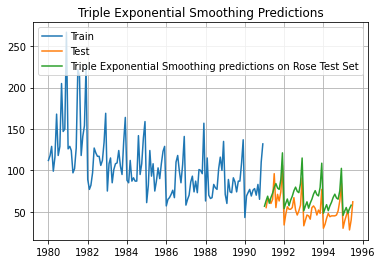

In [60]:
plt.plot(train_r, label='Train')
plt.plot(test_r, label='Test')

plt.plot(TES_r_m_predict, label='Triple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [61]:
print('TES RMSE:',mean_squared_error(test_r.values,TES_r_m_predict.values,squared=False))

TES RMSE: 25.934487196748442


In [62]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r.values,TES_r_m_predict.values,squared=False)]}
                           ,index=['TES_multiplicative'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487


In [63]:
TES_s_m = ExponentialSmoothing(train_s,trend='add',seasonal='multiplicative')
TES_s_m= TES_s_m.fit()
TES_s_m.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'damping_slope': nan,
 'initial_level': 1639.9993399027126,
 'initial_seasons': array([1.00841739, 0.96899632, 1.24171643, 1.13206069, 0.93984119,
        0.93813873, 1.22454059, 1.54419134, 1.27332629, 1.63190096,
        2.4826116 , 3.11820572]),
 'initial_slope': 4.884660841988308,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15443784802011637,
 'smoothing_seasonal': 0.37116865308973673,
 'smoothing_slope': 7.4133171248060435e-28,
 'use_boxcox': False}

In [64]:
TES_s_m_predict= TES_s_m.forecast(len(test_s))
TES_s_m_predict

1991-01-01    1602.230902
1991-02-01    1374.018912
1991-03-01    1807.607439
1991-04-01    1704.811690
1991-05-01    1602.617906
1991-06-01    1415.709220
1991-07-01    1945.224617
1991-08-01    1910.645057
1991-09-01    2435.747876
1991-10-01    3334.197743
1991-11-01    4408.804412
1991-12-01    6329.946140
1992-01-01    1656.483176
1992-02-01    1420.412913
1992-03-01    1868.470383
1992-04-01    1762.052844
1992-05-01    1656.277636
1992-06-01    1462.978880
1992-07-01    2009.994251
1992-08-01    1974.087270
1992-09-01    2516.402744
1992-10-01    3444.299147
1992-11-01    4553.991795
1992-12-01    6537.828611
1993-01-01    1710.735451
1993-02-01    1466.806915
1993-03-01    1929.333327
1993-04-01    1819.293998
1993-05-01    1709.937367
1993-06-01    1510.248539
1993-07-01    2074.763885
1993-08-01    2037.529483
1993-09-01    2597.057612
1993-10-01    3554.400550
1993-11-01    4699.179178
1993-12-01    6745.711082
1994-01-01    1764.987725
1994-02-01    1513.200916
1994-03-01  

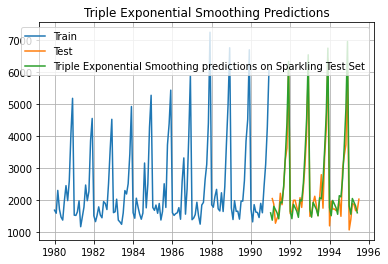

In [65]:
plt.plot(train_s, label='Train')
plt.plot(test_s, label='Test')

plt.plot(TES_s_m_predict, label='Triple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [66]:
print('TES RMSE:',mean_squared_error(test_s.values,TES_s_m_predict.values,squared=False))

TES RMSE: 1564.623953713168


In [67]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s.values,TES_s_m_predict.values,squared=False)]}
                           ,index=['TES_multiplicative'])

results_s= pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954


**Linear Regression**

In [68]:
train_r.shape

(132, 1)

In [69]:
test_r.shape

(54, 1)

In [70]:
train_r_time = [i+1 for i in range(len(train_r))]
test_r_time = [i+133 for i in range(len(test_r))]
print('Training Time instance','\n',train_r_time)
print('Test Time instance','\n',test_r_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [71]:
LR_train= train_r.copy()
LR_test=test_r.copy()

In [72]:
LR_train['Time']= train_r_time
LR_test['Time']=test_r_time

In [73]:
LR_train.head()

,Rose,Time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [74]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(LR_train[['Time']],LR_train['Rose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

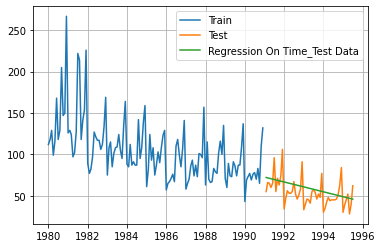

In [75]:
train_pred_model1= lr.predict(LR_train[['Time']])
LR_train['RegOnTime'] = train_pred_model1

test_pred_model1= lr.predict(LR_test[['Time']])
LR_test['RegOnTime'] = test_pred_model1

plt.plot( train_r['Rose'], label='Train')
plt.plot(test_r['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [76]:
rmse_lr_r_test = mean_squared_error(test_r['Rose'],test_pred_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data of Rose,  RMSE is %3.3f " %(rmse_lr_r_test))


For RegressionOnTime forecast on the Test Data of Rose,  RMSE is 15.377 


In [77]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r['Rose'],test_pred_model1,squared=False)]}
                           ,index=['Linear Regression'])

results_r= pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055


In [78]:
train_s.shape

(132, 1)

In [79]:
test_s.shape

(54, 1)

In [80]:
train_s_time = [i+1 for i in range(len(train_s))]
test_s_time = [i+133 for i in range(len(test_s))]
print('Training Time instance','\n',train_s_time)
print('Test Time instance','\n',test_s_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [81]:
lr_train= train_s.copy()
lr_test=test_s.copy()

In [82]:
lr_train['time']=train_s_time
lr_test['time']=test_s_time

In [83]:
lr_train.head()

,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


In [84]:

lr.fit(lr_train[['time']],lr_train['Sparkling'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

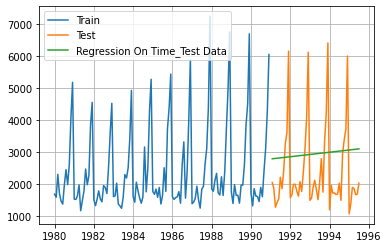

In [85]:
train_pred_s_model1= lr.predict(lr_train[['time']])
lr_train['RegOnTime'] = train_pred_s_model1

test_pred_s_model1= lr.predict(lr_test[['time']])
lr_test['RegOnTime'] = test_pred_s_model1

plt.plot( train_s['Sparkling'], label='Train')
plt.plot(test_s['Sparkling'], label='Test')
plt.plot(lr_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [86]:
rmse_lr_s_test = mean_squared_error(test_s['Sparkling'],test_pred_s_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data of Rose,  RMSE is %3.3f " %(rmse_lr_s_test))

For RegressionOnTime forecast on the Test Data of Rose,  RMSE is 1394.441 


In [87]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s['Sparkling'],test_pred_s_model1,squared=False)]}
                           ,index=['Linear Regression'])

results_s= pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182


**Naive Model**

In [88]:
NM_train=train_r.copy()
NM_test=test_r.copy()


In [89]:
NM_test['naive'] = np.asarray(train_r['Rose'])[len(np.asarray(train_r['Rose']))-1]
NM_test['naive'].head()

YearMonth
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
1991-06-01    132.0
Name: naive, dtype: float64

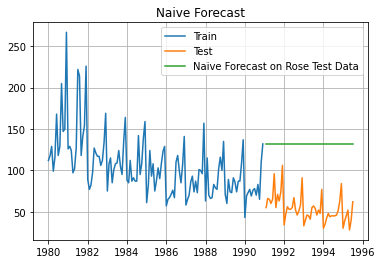

In [90]:
plt.plot(NM_train['Rose'], label='Train')
plt.plot(test_r['Rose'], label='Test')

plt.plot(NM_test['naive'], label='Naive Forecast on Rose Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [91]:
rmse_model2_r_test = mean_squared_error(test_r['Rose'],NM_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model2_r_test))

For RegressionOnTime forecast on the Rose Test Data,  RMSE is 79.770


In [92]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r['Rose'],NM_test['naive'],squared=False)]}
                           ,index=['Naive Model'])

results_r= pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388


In [93]:
nm_train=train_s.copy()
nm_test=test_s.copy()


In [94]:
nm_test['naive'] = np.asarray(train_s['Sparkling'])[len(np.asarray(train_s['Sparkling']))-1]
nm_test['naive'].head()

YearMonth
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
1991-06-01    6047
Name: naive, dtype: int64

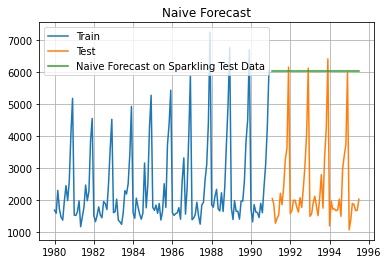

In [95]:
plt.plot(nm_train['Sparkling'], label='Train')
plt.plot(test_s['Sparkling'], label='Test')

plt.plot(nm_test['naive'], label='Naive Forecast on Sparkling Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [96]:
rmse_model2_s_test = mean_squared_error(test_s['Sparkling'],nm_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model2_s_test))

For RegressionOnTime forecast on the Rose Test Data,  RMSE is 3858.888


In [97]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s['Sparkling'],nm_test['naive'],squared=False)]}
                           ,index=['Naive Model'])

results_s= pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237


**Simple Average**

In [98]:
SimpleAverage_train = train_r.copy()
SimpleAverage_test = test_r.copy()


In [99]:
SimpleAverage_test['mean_forecast'] = train_r['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394
1991-06-01,65.0,104.939394


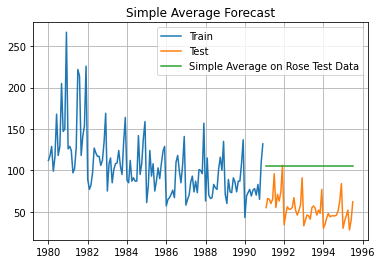

In [100]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Rose Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [101]:
rmse_model3_r_test = mean_squared_error(test_r['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Rose Test Data,  RMSE is %3.3f" %(rmse_model3_r_test))


For Simple Average forecast on the Rose Test Data,  RMSE is 53.527


In [102]:
results_r_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_r['Rose'],SimpleAverage_test['mean_forecast'],squared=False)]}
                           ,index=['Simple Average Model'])

results_r= pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388
Simple Average Model,53.526783


In [103]:
SA_train = train_s.copy()
SA_test = test_s.copy()


In [104]:
SA_test['mean_forecast'] = train_s['Sparkling'].mean()
SA_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303
1991-06-01,1540,2403.780303


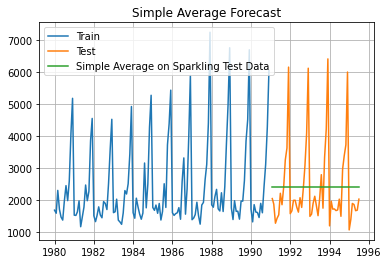

In [105]:
plt.plot(SA_train['Sparkling'], label='Train')
plt.plot(SA_test['Sparkling'], label='Test')

plt.plot(SA_test['mean_forecast'], label='Simple Average on Sparkling Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [106]:
rmse_model3_s_test= mean_squared_error(test_s['Sparkling'],SA_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Sparkling Test Data,  RMSE is %3.3f" %(rmse_model3_s_test))

For Simple Average forecast on the Sparkling Test Data,  RMSE is 1285.021


In [107]:
results_s_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_s['Sparkling'],SA_test['mean_forecast'],squared=False)]}
                           ,index=['Simple Average Model'])

results_s= pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003


** Moving Averages**

In [108]:
MovingAverage = dfr.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [109]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


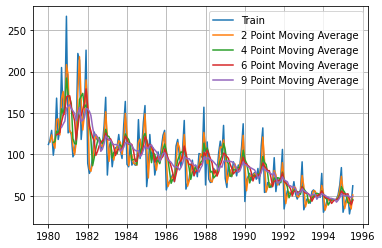

In [110]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [111]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991' ]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>'1991']

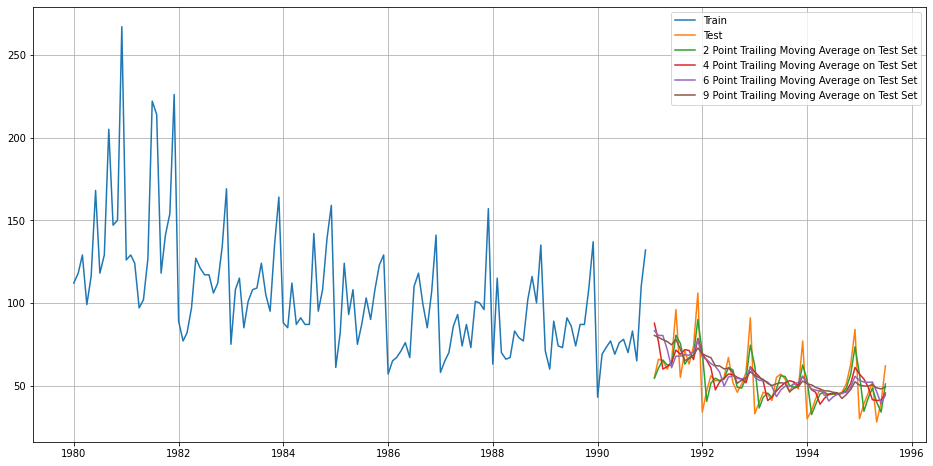

In [112]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();


In [113]:
rmse_model4_r_test_2 = mean_squared_error(test_r['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_r_test_2))



rmse_model4_r_test_4 = mean_squared_error(test_r['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_r_test_4))


rmse_model4_r_test_6 =mean_squared_error(test_r['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_r_test_6))


rmse_model4_r_test_9 = mean_squared_error(test_r['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_r_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 10.355
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.729
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.061
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.374


In [114]:
results_r_temp = pd.DataFrame({'Test RMSE': [rmse_model4_r_test_2,rmse_model4_r_test_4
                                          ,rmse_model4_r_test_6,rmse_model4_r_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388
Simple Average Model,53.526783
2pointTrailingMovingAverage,10.354816
4pointTrailingMovingAverage,13.729109
6pointTrailingMovingAverage,14.060788


In [115]:
movingaverage = dfs.copy()
movingaverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [116]:
movingaverage['Trailing_2'] = movingaverage['Sparkling'].rolling(2).mean()
movingaverage['Trailing_4'] = movingaverage['Sparkling'].rolling(4).mean()
movingaverage['Trailing_6'] = movingaverage['Sparkling'].rolling(6).mean()
movingaverage['Trailing_9'] = movingaverage['Sparkling'].rolling(9).mean()

movingaverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


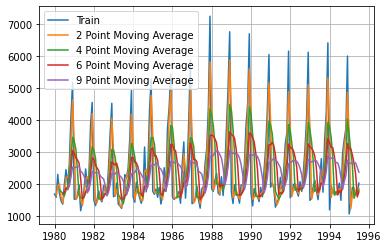

In [117]:
plt.plot(movingaverage['Sparkling'], label='Train')
plt.plot(movingaverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(movingaverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(movingaverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(movingaverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


In [118]:
trailing_movingaverage_train=movingaverage[movingaverage.index<'1991' ]
trailing_movingaverage_test=movingaverage[movingaverage.index>'1991']

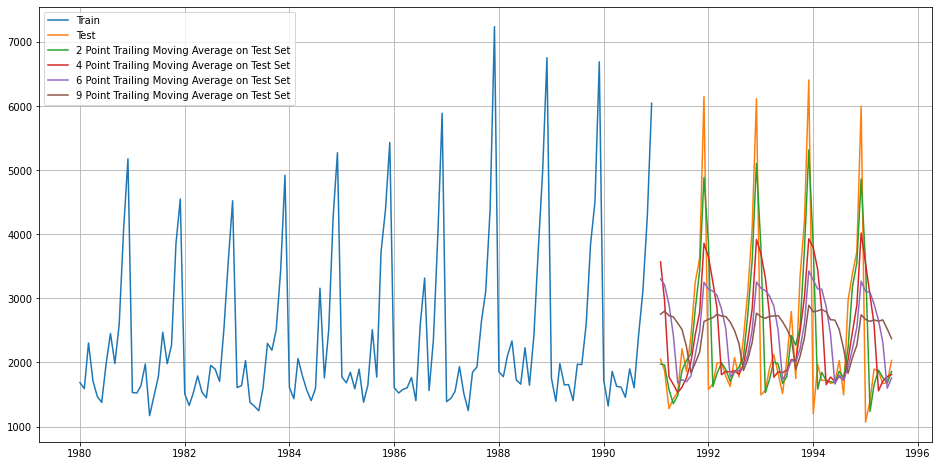

In [119]:
plt.figure(figsize=(16,8))
plt.plot(trailing_movingaverage_train['Sparkling'], label='Train')
plt.plot(trailing_movingaverage_test['Sparkling'], label='Test')


plt.plot(trailing_movingaverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_movingaverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();


In [120]:
rmse_model4_s_test_2 = mean_squared_error(test_s['Sparkling'],trailing_movingaverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_s_test_2))


rmse_model4_s_test_4 = mean_squared_error(test_s['Sparkling'],trailing_movingaverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_s_test_4))


rmse_model4_s_test_6 =mean_squared_error(test_s['Sparkling'],trailing_movingaverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_s_test_6))


rmse_model4_s_test_9 = mean_squared_error(test_s['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_s_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 2679.853


In [121]:
results_s_temp = pd.DataFrame({'Test RMSE': [rmse_model4_s_test_2,rmse_model4_s_test_4
                                          ,rmse_model4_s_test_6,rmse_model4_s_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

results_s = pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


Stationarity:

H0: The time series  is non stationary 

H1: The time series is stationary

In [122]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dfr['Rose'] , regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.241
DF test p-value is 0.4669420602610205
Number of lags used 13


Since alpha=0.05 and the p-value is greater, H0 holds true and the series is non-stationary

In [123]:
dfrtest = adfuller(dfr['Rose'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrtest[0])
print('DF test p-value is' ,dfrtest[1])
print('Number of lags used' ,dfrtest[2])

DF test statistic is -8.161
DF test p-value is 3.028272263689071e-11
Number of lags used 12


After differencing one level we get a stationary model at 5% significance level

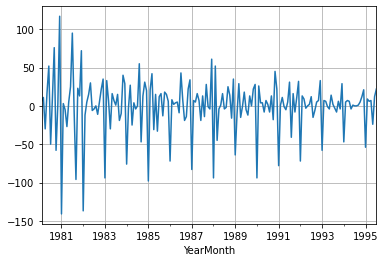

In [124]:
dfr['Rose'].diff().dropna().plot(grid=True);

In [125]:
dfstest = adfuller(dfs['Sparkling'] , regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932263
Number of lags used 12


Since alpha=0.05 and the p-value is greater, H0 holds true and the series is non-stationary



In [126]:
dfstest = adfuller(dfs['Sparkling'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfstest[0])
print('DF test p-value is' ,dfstest[1])
print('Number of lags used' ,dfstest[2])


DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


After differencing one level we get a stationary model at 5% significance level

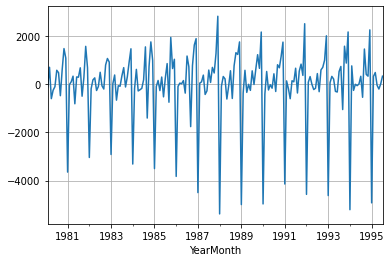

In [127]:
dfs['Sparkling'].diff().dropna().plot(grid=True);

In [128]:
r_test = adfuller(train_r['Rose'] , regression='ct')
print('DF test statistic is %3.3f' %r_test[0])
print('DF test p-value is' ,r_test[1])
print('Number of lags used' ,r_test[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047078
Number of lags used 13


In [129]:
r_test = adfuller(train_r['Rose'].diff().dropna() , regression='ct')
print('DF test statistic is %3.3f' %r_test[0])
print('DF test p-value is' ,r_test[1])
print('Number of lags used' ,r_test[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567832276e-08
Number of lags used 12


In [130]:
s_test = adfuller(train_s['Sparkling'] , regression='ct')
print('DF test statistic is %3.3f' %r_test[0])
print('DF test p-value is' ,s_test[1])
print('Number of lags used' ,s_test[2])

DF test statistic is -6.804
DF test p-value is 0.5674110388593689
Number of lags used 12


In [131]:
s_test = adfuller(train_s['Sparkling'].diff().dropna() , regression='ct')
print('DF test statistic is %3.3f' %r_test[0])
print('DF test p-value is' ,s_test[1])
print('Number of lags used' ,s_test[2])

DF test statistic is -6.804
DF test p-value is 8.4792106555143e-11
Number of lags used 11


In [132]:

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [133]:
ARIMA_r_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_r_AIC

,param,AIC


In [134]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    ARIMA_model = ARIMA(train_r['Rose'].values,order=param).fit()
    ARIMA_r_AIC = ARIMA_r_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    ARIMA_r_AIC

In [135]:
ARIMA_r_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359225
4,"(1, 1, 1)",1277.775749
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [136]:
auto_r_ARIMA = ARIMA(train_r['Rose'], order=(0,1,2))

results_auto_r_ARIMA = auto_r_ARIMA.fit()

print(results_auto_r_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 25 Apr 2021   AIC                           1276.835
Time:                        12:24:20   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [137]:
predicted_auto_r_ARIMA = results_auto_r_ARIMA.forecast(steps=len(test_r))

In [138]:
rmse = mean_squared_error(test_r['Rose'],predicted_auto_r_ARIMA[0],squared=False)
print(rmse)

15.718344936147135


In [139]:
results_r_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Automated ARIMA'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388
Simple Average Model,53.526783
2pointTrailingMovingAverage,10.354816
4pointTrailingMovingAverage,13.729109
6pointTrailingMovingAverage,14.060788


In [140]:
ARIMA_s_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_s_AIC


,param,AIC


In [141]:
for param in pdq:
    ARIMA_s_model = ARIMA(train_s['Sparkling'].values,order=param).fit()
    ARIMA_s_AIC = ARIMA_s_AIC.append({'param':param, 'AIC': ARIMA_s_model.aic}, ignore_index=True)
    ARIMA_s_AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [142]:
ARIMA_s_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.617508
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035600
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [143]:
auto_s_ARIMA = ARIMA(train_s['Sparkling'], order=(2,1,2))

results_auto_s_ARIMA = auto_s_ARIMA.fit()

print(results_auto_s_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.577
Date:                Sun, 25 Apr 2021   AIC                           2210.618
Time:                        12:24:22   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.627
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5859      0.516     10.820      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [144]:
predicted_auto_s_ARIMA = results_auto_s_ARIMA.forecast(steps=len(test_s))

In [145]:
rmse_s = mean_squared_error(test_s['Sparkling'],predicted_auto_s_ARIMA[0],squared=False)
print(rmse_s)

1373.7610032994928


In [146]:
results_s_temp = pd.DataFrame({'Test RMSE': [rmse_s]}
                           ,index=['Automated ARIMA'])

results_s = pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


In [147]:
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


**Automated SARIMA**

In [148]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [150]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [151]:
SARIMA_r_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_r_AIC

,param,seasonal,AIC


In [155]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_r_model = sm.tsa.statespace.SARIMAX(train_r['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal)
                            
            
        results_r_SARIMA = SARIMA_r_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_r_SARIMA.aic))
        SARIMA_r_AIC = SARIMA_r_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_r_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1333.154672912435
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1334.6171869062682
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1307.1745776627954
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1334.089962218279
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1307.5482004520566
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1297.3217532903786
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1286.8762326759615
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1285.1044804285204
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1266.0478753702607
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1282.3098319748278
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1282.3023440813631
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1254.3454925227227
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1280.1354967869734
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1243.3453373435727
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1235.013834186201
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1232.9925480064448
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1229.2405847461196
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1209.2046603938816
SARIMA(0, 1, 2)x(0, 0, 0, 6) - 

In [156]:
SARIMA_r_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1204.376417
80,"(2, 1, 2)","(2, 0, 2, 6)",1206.121923
71,"(2, 1, 1)","(2, 0, 2, 6)",1206.664461
26,"(0, 1, 2)","(2, 0, 2, 6)",1206.898524
17,"(0, 1, 1)","(2, 0, 2, 6)",1209.204660


In [157]:
auto_r_SARIMA = sm.tsa.statespace.SARIMAX(train_r['Rose'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6))
results_auto_r_SARIMA = auto_r_SARIMA.fit(maxiter=1000)
print(results_auto_r_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -594.188
Date:                           Sun, 25 Apr 2021   AIC                           1204.376
Time:                                   12:41:59   BIC                           1227.378
Sample:                               01-01-1980   HQIC                          1213.723
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5417      0.172     -3.156      0.002      -0.878      -0.205
ma.L1         -0.1572      0.148     -1.059

In [158]:
predicted_auto_r_SARIMA = results_auto_r_SARIMA.get_forecast(steps=len(test_r))

In [171]:
mse = mean_squared_error(test_r['Rose'],predicted_auto_r_SARIMA.predicted_mean,squared=False)
mse

26.086710319897065

In [161]:
results_r_temp=pd.DataFrame({'Test RMSE': [mse]}
                           ,index=['Automated SARIMA'])
results_r=pd.concat([results_r,results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388
Simple Average Model,53.526783
2pointTrailingMovingAverage,10.354816
4pointTrailingMovingAverage,13.729109
6pointTrailingMovingAverage,14.060788


In [162]:
SARIMA_s_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_s_AIC

,param,seasonal,AIC


In [164]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_s_model = sm.tsa.statespace.SARIMAX(train_s['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                           enforce_invertibility=False)
                            
            
        results_s_SARIMA = SARIMA_s_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_s_SARIMA.aic))
        SARIMA_s_AIC = SARIMA_s_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_s_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890287
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442614
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360121491463
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510361


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780565657
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908282
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.187633954419
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242877805
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135003
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274098868
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510476081
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933228334
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473510496767
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687054
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840215947
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.1151461918766
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234554
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.411127951319
SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963213440883
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079048694
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190985822086
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:

In [165]:
SARIMA_s_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
68,"(1, 1, 2)","(2, 0, 2, 6)",1727.670865
41,"(0, 1, 2)","(2, 0, 2, 6)",1727.888803
95,"(2, 1, 2)","(2, 0, 2, 6)",1729.168821
32,"(0, 1, 1)","(2, 0, 2, 6)",1741.647351
59,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [166]:
auto_s_SARIMA = sm.tsa.statespace.SARIMAX(train_s['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6))
results_auto_s_SARIMA = auto_s_SARIMA.fit(maxiter=1000)
print(results_auto_s_SARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -995.549
Date:                           Sun, 25 Apr 2021   AIC                           2007.098
Time:                                   12:50:22   BIC                           2030.100
Sample:                               01-01-1980   HQIC                          2016.445
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8197      0.109     -7.498      0.000      -1.034      -0.605
ma.L1         -0.0546      0.110     -0.498

In [167]:
predicted_auto_s_SARIMA = results_auto_s_SARIMA.get_forecast(steps=len(test_s))

In [170]:
mse_s = mean_squared_error(test_s['Sparkling'],predicted_auto_s_SARIMA.predicted_mean,squared=False)
mse_s

1491.5191907885153

In [169]:
results_s_temp=pd.DataFrame({'Test RMSE': [mse_s]}
                           ,index=['Automated SARIMA'])
results_s=pd.concat([results_s,results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


**MANUAL ARIMA**

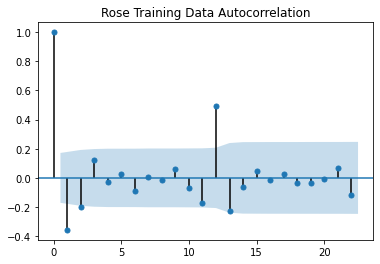

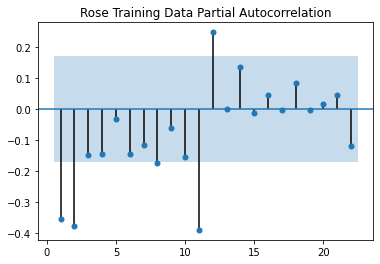

In [177]:
plot_acf(train_r.diff().dropna(),title='Rose Training Data Autocorrelation')
plot_pacf(train_r.diff().dropna(),title='Rose Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

for rose test set q=2 and p=2

In [178]:
manual_r_ARIMA = ARIMA(train_r['Rose'], order=(2,1,2))
results_manual_r_ARIMA = manual_r_ARIMA.fit()

print(results_manual_r_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 25 Apr 2021   AIC                           1279.299
Time:                        13:22:18   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.046      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [184]:
predicted_manual_r_ARIMA = results_manual_r_ARIMA.forecast(steps=len(test_r))
rmse = mean_squared_error(test_r['Rose'],predicted_manual_r_ARIMA[0],squared=False)
print(rmse)

15.48057571626001


In [185]:
results_r_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA'])

results_r = pd.concat([results_r, results_r_temp])
results_r

,Test RMSE
SES_r,36.882124
DES,70.042356
TES_additive,28.352592
TES_multiplicative,25.934487
Linear Regression,15.377055
Naive Model,79.770388
Simple Average Model,53.526783
2pointTrailingMovingAverage,10.354816
4pointTrailingMovingAverage,13.729109
6pointTrailingMovingAverage,14.060788


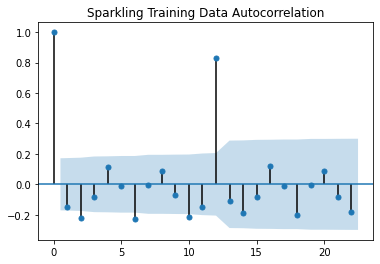

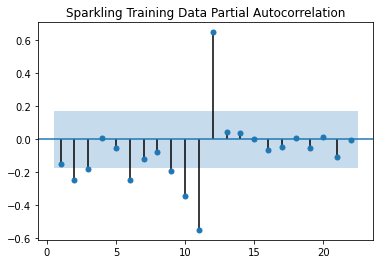

In [180]:
plot_acf(train_s.diff().dropna(),title='Sparkling Training Data Autocorrelation')
plot_pacf(train_s.diff().dropna(),title='Sparkling Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

p=1 q=1 

In [181]:
manual_s_ARIMA = ARIMA(train_s['Sparkling'], order=(1,1,1))
results_manual_s_ARIMA = manual_s_ARIMA.fit()

print(results_manual_s_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.377
Date:                Sun, 25 Apr 2021   AIC                           2235.014
Time:                        13:37:22   BIC                           2246.515
Sample:                    02-01-1980   HQIC                          2239.687
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7489      4.616      1.462      0.146      -2.299      15.797
ar.L1.D.Sparkling     0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.Sparkling    -1.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [186]:
predicted_manual_s_ARIMA = results_manual_s_ARIMA.forecast(steps=len(test_s))
rmse = mean_squared_error(test_s['Sparkling'],predicted_manual_s_ARIMA[0],squared=False)
print(rmse)

1467.0623131982095


In [187]:
results_s_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['Manual ARIMA'])

results_s = pd.concat([results_s, results_s_temp])
results_s

,Test RMSE
SES_s,1285.020994
DES,3833.622105
TES_additive,1577.669471
TES_multiplicative,1564.623954
Linear Regression,1394.441182
Naive Model,3858.888237
Simple Average Model,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


AttributeError: ignored

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0
